### Introduction ### 
Using historical data is pretty fun, but it often involves some grunt work. Sometimes data isn't available in a tabular format and needs to be manually transcribed so that it is ready for analysis. Today, I'm going to build off my first blog post and see if LLMs are able to transcribe values of a table for me. 

I'm going to continue working with the 1950 Census of Housing, linked [here](https://www.census.gov/library/publications/1953/dec/housing-vol-02.html). Some of the scans are very easy for me to read, and others are fuzzier. Let's see if GPT-4o is up for the test!

#### Warm-up exercise: an easy example #### 

Let's see if ChatGPT can read this clear scan. 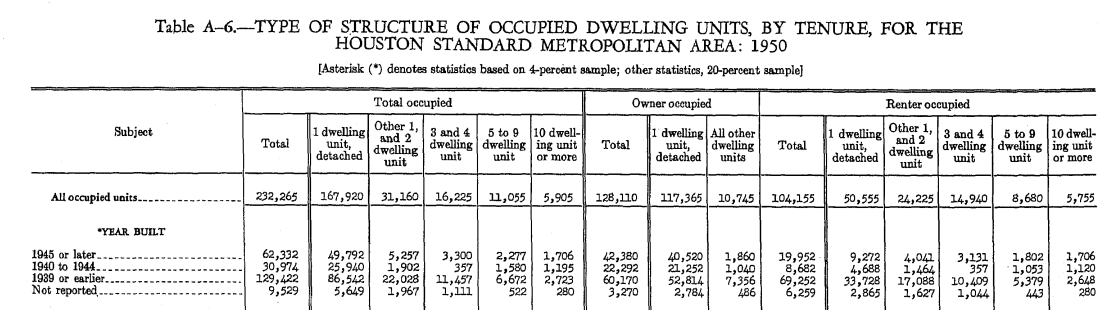

In [14]:
from openai import OpenAI
import os
import base64
import requests

from dotenv import load_dotenv
# Load API key
_ = load_dotenv()

def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

client = OpenAI()

In [15]:

prompt = 'Describe this image of a table. Suppose you needed to transcribe the data into a .csv file. How many columns would the .csv file have, and what would their names be? How many rows would there be? Think it though. Then, transcribe the data into a semicolon delimited file' 

base64_image = encode_image('img/img1.png')

response = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {
          "role": "user",
          "content": [
            {"type": "text", "text": prompt},
            {
              "type": "image_url",
              "image_url": {
                "url": f"data:image/jpeg;base64,{base64_image}"
              },
            },
          ],
        }
      ],
)

In [16]:
print(response.choices[0].message.content)

To transcribe the data into a .csv file, you first need to understand the structure of the table. Here's the breakdown:

### Columns
There are 13 columns in the table with the following headers:

1. Subject
2. Total occupied: Total
3. Total occupied: 1 dwelling unit, detached
4. Total occupied: Other 1, and 2 dwelling unit
5. Total occupied: 3 and 4 dwelling unit
6. Total occupied: 5 to 9 dwelling unit
7. Total occupied: 10 dwelling unit or more
8. Owner occupied: Total
9. Owner occupied: 1 dwelling unit, detached
10. Owner occupied: All other dwelling units
11. Renter occupied: Total
12. Renter occupied: 1 dwelling unit, detached
13. Renter occupied: Other 1, and 2 dwelling unit
14. Renter occupied: 3 and 4 dwelling unit
15. Renter occupied: 5 to 9 dwelling unit
16. Renter occupied: 10 dwelling unit or more

### Rows
There are six rows in total:

1. Header row
2. All occupied units
3. 1945 or later
4. 1940 to 1944
5. 1939 or earlier
6. Not reported

Now, let's transcribe the data into

I'm pretty impressed with the output, but it's not quite good enough to be able to trust 100% without double checking the numbers. I stared at the output for a little bit before realizing that one of the values in the bottom right of the pdf, 2,648, was transcribed as 3,682.

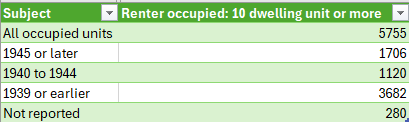

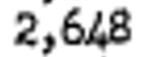


This is a little disheartening! Just to be sure, I'm going to ask ChatGPT to read only this one number specifically to see if the results improve. Maybe the size of the table it needed to transcribe seemed overwhelming, or the prompt I gave it was too long. 

In [19]:
prompt = 'What number is this?' 

base64_image = encode_image('img/img3.png')

completion = client.chat.completions.create(
    model="gpt-4o",
    n=3,
    messages=[
        {
          "role": "user",
          "content": [
            {"type": "text", "text": prompt},
            {
              "type": "image_url",
              "image_url": {
                "url": f"data:image/jpeg;base64,{base64_image}"
              },
            },
          ],
        }
      ],
)

response = completion.choices[0].message.content

In [ ]:
for resp in completion.choices: 
    print(resp.message.content)
    print('---')

In [33]:
for rnum, resp in enumerate(completion.choices,1): 
    display((f'Response {rnum}: {resp.message.content}'))

'Response 1: The number is 2,648.'

'Response 2: The number is 2,648.'

'Response 3: The number is 2,648.'

Yes, ChatGPT, that's correct! So maybe the issue was that I assigned too big of a task, making ChatGPT get "tired". 

#### The test #### 
Given that my intended warm-up round was not exactly a walk in the park, I'm going to make sure to not give ChatGPT too many numbers to transcribe in one prompt. However, I do want to see how it handles fuzzy text. Let's try with this image now.

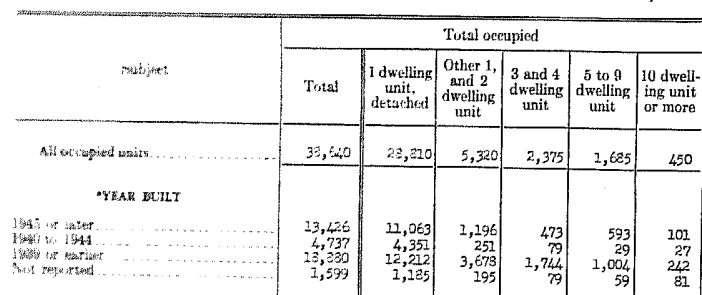

The row names are pretty fuzzy, so I'm excited to see what the LLM is able to make out. 

In [40]:
prompt = 'Describe this image of a table. Suppose you needed to transcribe the data into a .csv file. How many columns would the .csv file have, and what would their names be? How many rows would there be? Think it though. Then, transcribe the data into a semicolon delimited file' 

base64_image = encode_image('img/img4.png')

response = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {
          "role": "user",
          "content": [
            {"type": "text", "text": prompt},
            {
              "type": "image_url",
              "image_url": {
                "url": f"data:image/jpeg;base64,{base64_image}"
              },
            },
          ],
        }
      ],
)

In [41]:
print(response.choices[0].message.content)

To transcribe the table into a .csv file, we first identify the columns and rows.

### Columns

There are 7 columns in the table:
1. Subject
2. Total
3. 1 dwelling unit, detached
4. Other 1, and 2 dwelling unit
5. 3 and 4 dwelling unit
6. 5 to 9 dwelling unit
7. 10 dwelling unit or more

### Rows

There are 5 rows including the header row:
1. Header
2. All occupied units
3. Year built: 1940 or earlier
4. Year built: 1940 to 1949
5. Year built: 1950 or later
6. Year built: Not reported

### Transcription to a Semicolon Delimited File

Here's how the data would look in a semicolon-delimited format:

```
Subject;Total;1 dwelling unit, detached;Other 1, and 2 dwelling unit;3 and 4 dwelling unit;5 to 9 dwelling unit;10 dwelling unit or more
All occupied units;35,460;23,210;5,320;2,375;1,685;450
1940 or earlier;13,426;11,063;1,196;473;593;101
1940 to 1949;4,737;4,351;251;73;29;27
1950 or later;15,230;12,212;3,678;1,744;1,004;242
Not reported;1,599;1,185;195;79;59;81
```

This setup ensures t

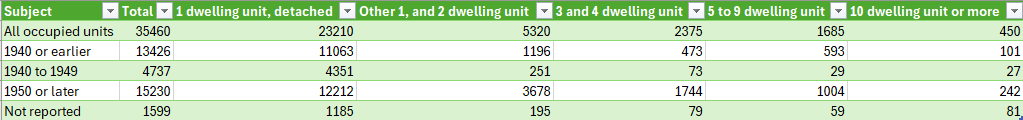